# Visualization - FordGoBike Data

### Bhanu Chander Kureti

## Investigation Overview

In this investigation, we will find the customer relationship, how user attributes, starting , ending locations imapcting business. This analysis also helps the company to know in which field they have to keep focus.

## Dataset Overview

The data consists of 36921 rows with 15 columns. It contains the information regarding:
- distance travelled
- type of user
- when and where riders start the trip
- when and where riders ends the trip 
- Gender and birthdate etc

### Dataset Source :
> source : https://www.lyft.com/bikes/bay-wheels/system-data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas.util.testing as tm
from datetime import datetime
import glob
import os
import datetime

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

/Users/bhanuchanderkureti/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load in the dataset into a pandas dataframe
df_master = pd.read_csv('Newyork-2020-citibike-master-data.csv')
df_master.head(5)

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,birth_year,gender,distance_miles,start_date,month,day,start_hourofday,user_age,duration_minutes,speed
0,122,2020-06-01 00:02:21.750,2020-06-01 00:04:24.325,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3639,Harborside,40.719252,...,1987,Male,0.180668,NaN,June,Monday,0,33,2.03,5.34
1,1282,2020-06-01 00:12:27.109,2020-06-01 00:33:50.054,3198,Heights Elevator,40.748716,-74.040443,3276,Marin Light Rail,40.714584,...,1988,Male,2.361559,NaN,June,Monday,0,32,21.37,6.63
2,186,2020-06-01 01:19:59.209,2020-06-01 01:23:05.893,3275,Columbus Drive,40.718355,-74.038914,3681,Grand St,40.715178,...,1987,Male,0.228816,NaN,June,Monday,1,33,3.10,4.43
3,131,2020-06-01 01:26:42.205,2020-06-01 01:28:53.804,3267,Morris Canal,40.712419,-74.038526,3681,Grand St,40.715178,...,1987,Male,0.195655,NaN,June,Monday,1,33,2.18,5.38
4,266,2020-06-01 01:27:33.709,2020-06-01 01:32:00.189,3639,Harborside,40.719252,-74.034234,3186,Grove St PATH,40.719586,...,1972,Female,0.465771,NaN,June,Monday,1,48,4.43,6.31


## Comparing Distance of Trips

> created bins for distance_miles
> Plot histogram for observation

### Observation:
> Most of the riders have travelled distance of 0.5 - 1 mile


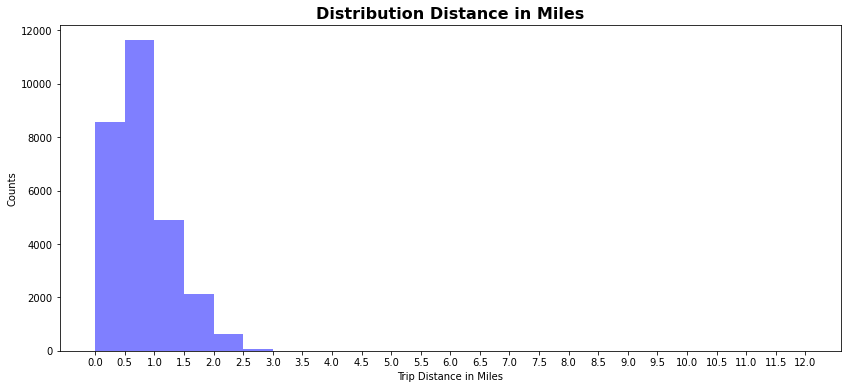

In [3]:
# Exploring distribution of Distance covered by users using histogram chart. This is step perofmed as univariate analysis
plt.figure(figsize=(14,6))
bins = np.arange(0, df_master.distance_miles.max()+2, .5)
ticks = np.arange(0, df_master.distance_miles.max()+2, .5)
plt.hist(data=df_master, x='distance_miles', bins=bins, color='blue', alpha = .5)
plt.xticks(ticks);
plt.xlabel('Trip Distance in Miles')
plt.ylabel('Counts')
plt.title('Distribution Distance in Miles',fontsize = 16, fontweight = 'bold');

## Comparing Gender with Trips

> count the distance value travelled by gender
> Plot countplot for observation

### Observation:
> Male Users are using bikes more than other type of gender

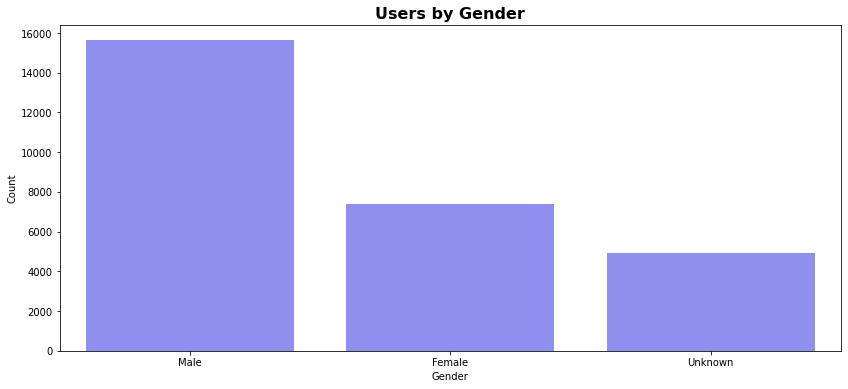

In [4]:
# Creating chart to see how users are distributed by gender
plt.figure(figsize=(14,6))
gender_value = df_master.gender.value_counts().index
sns.countplot(data=df_master, x='gender', color="blue", alpha =.5, order =gender_value );
plt.xlabel('Gender');
plt.ylabel('Count')
plt.title('Users by Gender',fontsize = 16, fontweight = 'bold');

## Comparing Users by weekday

> groupy day count the rides .
> Plot bar graph for observation

### Observation: 
> Usage of bikes is more in weekends than weekdays

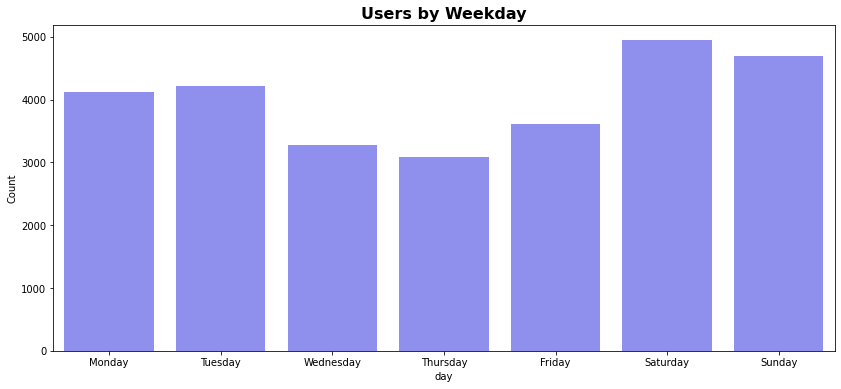

In [5]:
# creating bar to see bike usage by days
plt.figure(figsize=(14,6))
day_value = df_master.groupby('day')['bikeid'].count().index
sns.countplot(data=df_master, x='day', color="blue", alpha =.5, hue_order = day_value );
plt.xlabel('day');
plt.ylabel('Count')
plt.title('Users by Weekday',fontsize = 16, fontweight = 'bold');

## Comparing User type with trip duration

> Plot bar graph for observation

### Observation: 

> Usage of bikes is more in customer type than the subscriber type.

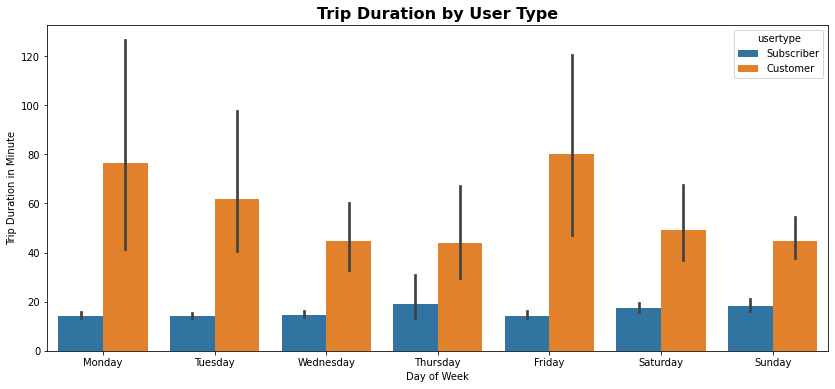

In [7]:
plt.figure(figsize=(14,6))
sns.barplot(data=df_master, x='day', y='duration_minutes',hue='usertype');
plt.xlabel('Day of Week');
plt.ylabel('Trip Duration in Minute')
plt.title('Trip Duration by User Type',fontsize = 16, fontweight = 'bold');

## Conclusion

#### The company should give some exciting offers to below categories increase their business,like:
> provide offers to female users

> provide offers to users who are students

> provide offers on weekdays

> provide offers on long rides

> provide offers for customers to become subscribers